# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharma_data_complete = pd.merge(mouse_metadata, study_results, how='left', on =['Mouse ID'])


# Display the data table for preview
pharma_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [97]:
# Checking the number of mice.
number_of_mice = pharma_data_complete['Mouse ID'].nunique()
number_of_mice

249

In [98]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
group_mice = pharma_data_complete.groupby(['Mouse ID', 'Timepoint']).count()
dupe_mice = group_mice.loc[group_mice['Sex']==2].index.get_level_values('Mouse ID').tolist()
dupe_mice

['g989', 'g989', 'g989', 'g989', 'g989']

In [99]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_list = pharma_data_complete.loc[pharma_data_complete['Mouse ID'] == 'g989']
dupe_list

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [100]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_pharma_data_complete = pharma_data_complete[pharma_data_complete["Mouse ID"] != "g989"]
clean_pharma_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [101]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = clean_pharma_data_complete['Mouse ID'].nunique()
number_of_mice_clean

248

## Summary Statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_pharma_data_complete.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_volume = drug_regimen['Tumor Volume (mm3)'].mean()
median_volume = drug_regimen['Tumor Volume (mm3)'].median()
variance_volume = drug_regimen['Tumor Volume (mm3)'].var()
std_volume = drug_regimen['Tumor Volume (mm3)'].std()
sem_volume = drug_regimen['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_regimen = pd.DataFrame({
    'Mean Tumor Volume': mean_volume,
    'Median Tumor Volume': median_volume,
    'Tumor Volume Variance': variance_volume,
    'Tumor Volume Std. Dev.': std_volume,
    'Tumor Volume Std. Err.': sem_volume})

summary_regimen


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_pharma_data_complete.groupby(["Drug Regimen"]).agg(
    {
        "Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]
    }
) 


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

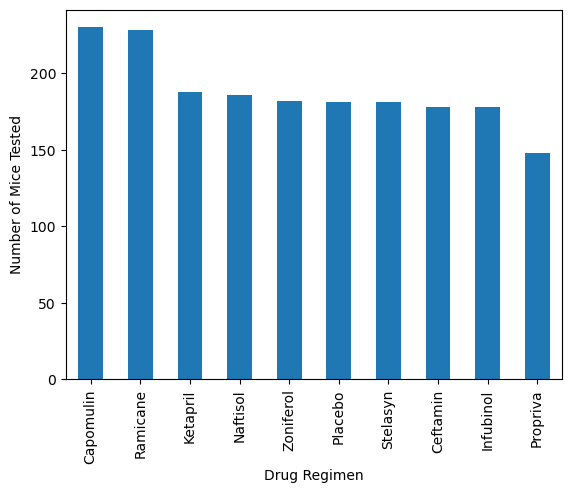

In [104]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_counts = clean_pharma_data_complete.groupby('Drug Regimen')['Timepoint'].count()
timepoint_counts = timepoint_counts.sort_values(ascending=False)
timepoint_counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()


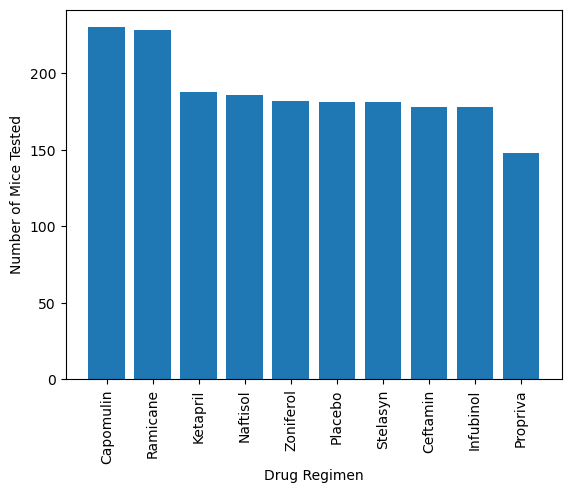

In [105]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_counts = clean_pharma_data_complete.groupby('Drug Regimen')['Timepoint'].count()
timepoint_counts = timepoint_counts.sort_values(ascending=False)
x_values = timepoint_counts.index
y_values = timepoint_counts.values
plt.bar(x_values, y_values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()


Sex
Female    922
Male      958
Name: Sex, dtype: int64

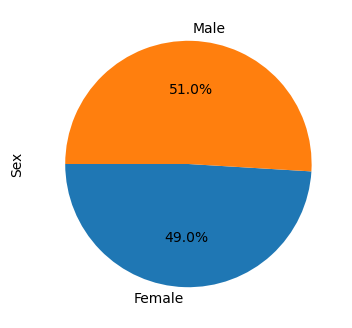

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_type=clean_pharma_data_complete.groupby(["Sex"])

count_mice_per_gender = gender_type["Sex"].count()

gender_plot = count_mice_per_gender.plot(kind='pie', figsize=(5,4), autopct="%1.1f%%", startangle=180)

count_mice_per_sex

Male      958
Female    922
Name: Sex, dtype: int64

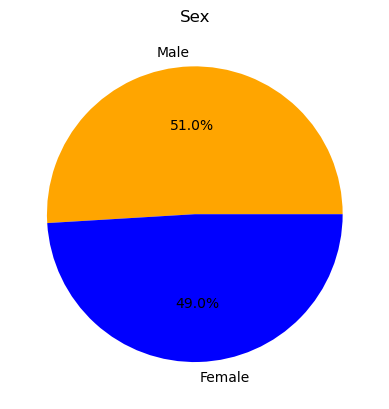

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
counts = clean_pharma_data_complete['Sex'].value_counts()

# The colors of each section of the pie chart
colors = ["orange", "blue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title("Sex")
plt.pie(counts, labels=labels, colors=colors,
        autopct="%1.1f%%")

counts

## Quartiles, Outliers and Boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_pharma_data_complete.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(last_timepoints, clean_pharma_data_complete, how='left', on=["Mouse ID","Timepoint"])
final_tumor_volumes = final_tumor_volumes[final_tumor_volumes["Drug Regimen"].isin(treatments)]
final_tumor_volumes

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [109]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for drug_treat in treatment_regimens:
    final_tumor_vol = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == drug_treat]['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug_treat}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Box Plots

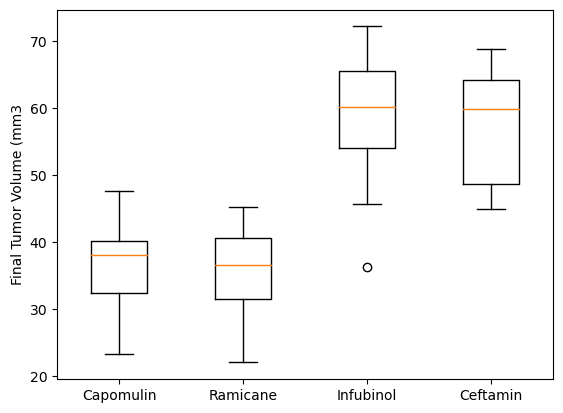

In [110]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot_list  = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3')
ax1.boxplot(tumor_vol_data, labels = box_plot_list)
plt.show()

## Line and Scatter Plots

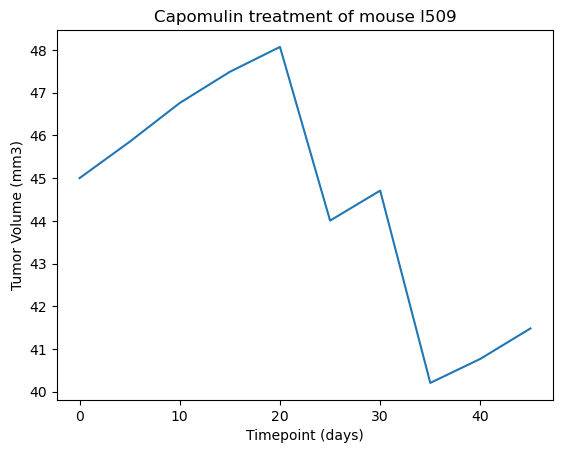

In [111]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_pharma_data_complete[clean_pharma_data_complete["Drug Regimen"] == "Capomulin"]

# mouse ID that was treated with Capomulin
mouse_cap = "l509"

# Filter DataFrame only data for chosen mouse
mouse_df = capomulin_df[capomulin_df["Mouse ID"] == mouse_cap]


# Plot
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
plt.title(f"Capomulin treatment of mouse {mouse_cap}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


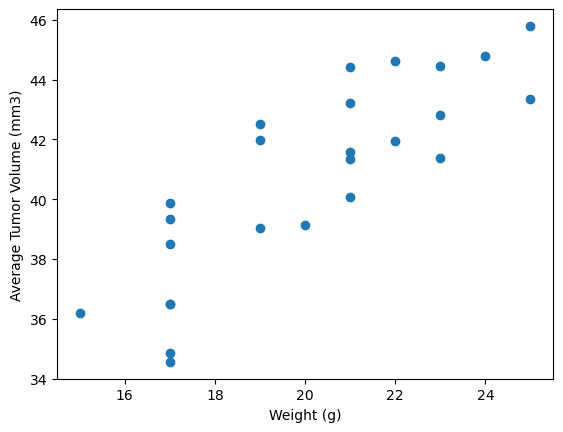

In [112]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tum_vol_cap = capomulin_df.groupby('Mouse ID').mean()
mouse_tum_mean = capomulin_df.groupby('Mouse ID').mean('Tumor Volume (mm3)')
mouse_weight_mean = capomulin_df.groupby('Mouse ID').mean('Weight (g)')

# Create a scatter plot of average tumor volume vs. mouse weight
plt.scatter(mouse_weight_mean['Weight (g)'], mouse_tum_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

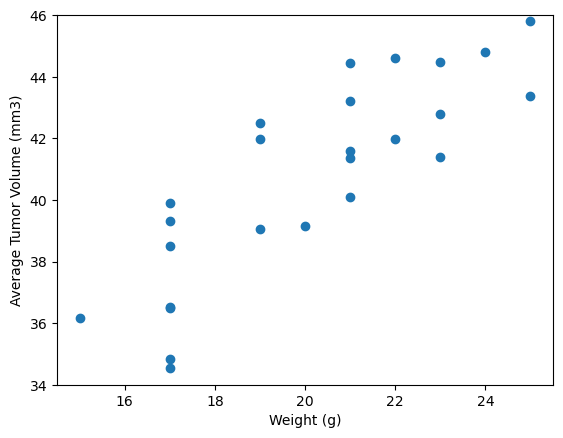

In [113]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_regimen = clean_pharma_data_complete.loc[clean_pharma_data_complete["Drug Regimen"] == "Capomulin"] 

# fig1, ax1 = plt.subplots()
avg_tum_vol_cap = capomulin_regimen.groupby(['Mouse ID']).mean()
weight = avg_tum_vol_cap['Weight (g)']
volume= avg_tum_vol_cap['Tumor Volume (mm3)']

plt.scatter(weight, volume)
plt.ylim(34, 46)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

The correlation between mouse weight and the average tumor volume is 0.84


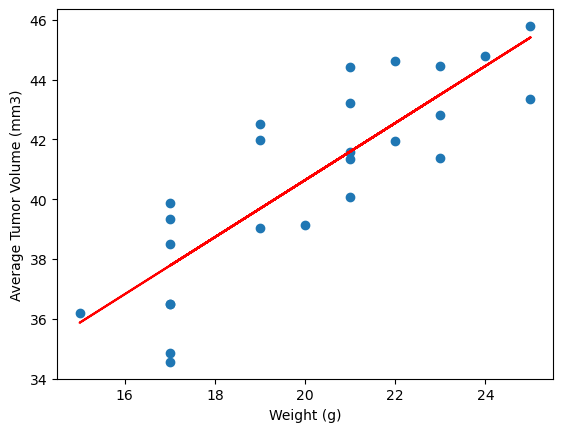

In [114]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(avg_tum_vol_cap['Weight (g)'],avg_tum_vol_cap['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()